In [6]:
#importing libraries
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
data=pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")

In [8]:
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [20]:
print(data.keys())

Index(['Hours', 'Scores'], dtype='object')


In [9]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [10]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [12]:
data.dtypes

Hours     float64
Scores      int64
dtype: object

In [14]:
data["Hours"].value_counts()

2.5    2
2.7    2
3.8    1
8.5    1
3.5    1
1.5    1
5.5    1
4.5    1
5.9    1
6.1    1
7.7    1
1.9    1
1.1    1
4.8    1
8.3    1
8.9    1
7.4    1
7.8    1
5.1    1
3.2    1
9.2    1
3.3    1
6.9    1
Name: Hours, dtype: int64

In [15]:
data["Scores"].value_counts()

30    3
95    1
62    1
85    1
86    1
67    1
24    1
69    1
17    1
41    1
42    1
75    1
47    1
76    1
81    1
20    1
21    1
54    1
88    1
25    1
27    1
60    1
35    1
Name: Scores, dtype: int64

In [17]:
data.shape

(25, 2)

In [18]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

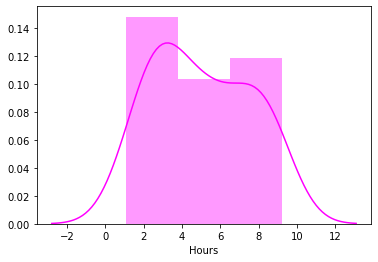

In [55]:
## EDA


sns.distplot(data.Hours, color = "magenta")

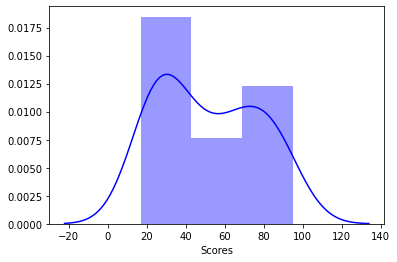

In [57]:
sns.distplot(data.Scores, color = "blue")

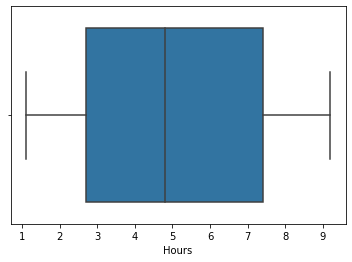

In [60]:
sns.boxplot(data['Hours'])

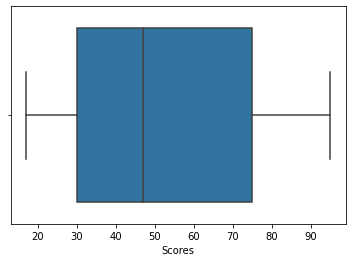

In [61]:
sns.boxplot(data['Scores'])

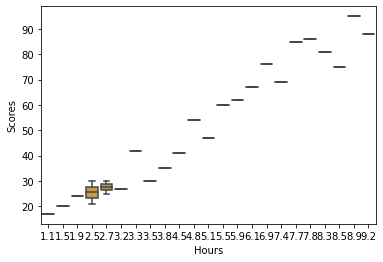

In [63]:
sns.boxplot(x = "Hours", y = "Scores", data = data)

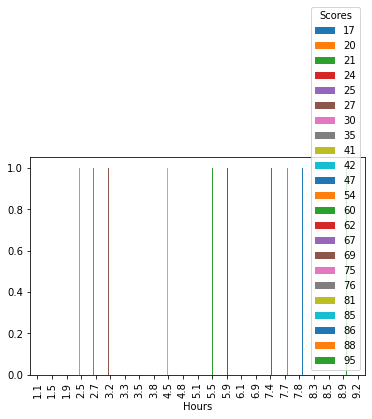

In [64]:
pd.crosstab(data['Hours'],data['Scores']).plot(kind='bar')

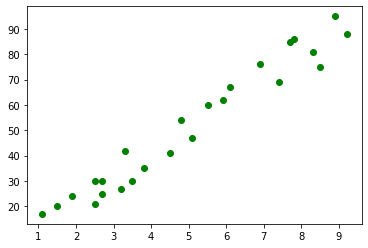

In [27]:
##Check the Relationship between dependent variables and the independent 


plt.scatter(data.Hours,data.Scores, color='g')

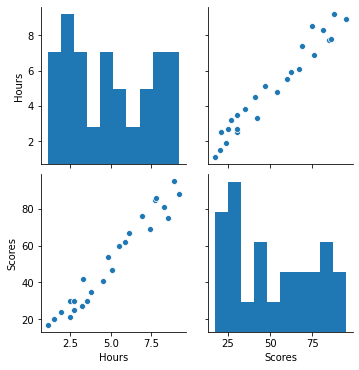

In [28]:
## Checking the pair plots and heatmap

sns.pairplot(data)
plt.show()

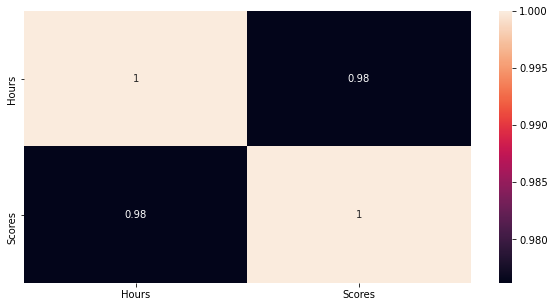

In [29]:
## Heatmap

plt.figure(figsize=[10,5])
sns.heatmap(data.corr(),annot=True)

### To check the target column is normal or not

In [66]:
from scipy.stats import shapiro,levene,mannwhitneyu

In [67]:
shapiro(data.Scores)

(0.9168438911437988, 0.04343847185373306)

If your p-value is less than your selected alpha level (typically 0.05), you reject the null hypothesis in favor of the alternative hypothesis. If the p-value is above your alpha value, you fail to reject the null hypothesis.
null hypothesis is not normal which we will reject...target column is normal

In [22]:
X=data.iloc[:,:-1].values
Y=data.iloc[:,1].values

In [34]:
# Split the data into train and test
# train data -80%and test data -20%
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train,Y_test=train_test_split(X,Y, test_size=0.20,random_state=0)


print(X_train.shape)
print(X_test.shape)
print(Y_test.shape)

(20, 1)
(5, 1)
(5,)


In [24]:
## Applying Linera Regression model 

from sklearn.linear_model import LinearRegression

lin_reg =LinearRegression()
lin_reg.fit(X_train,Y_train)

LinearRegression()

In [25]:
lin_reg=LinearRegression()
model=lin_reg.fit(X_train,Y_train)
print(f'R^2 score for train :{lin_reg.score(X_train, Y_train)}')
print(f'R^2 score for test :{lin_reg.score(X_test, Y_test)}')

R^2 score for train :0.9637848283990599
R^2 score for test :0.8421031525243527


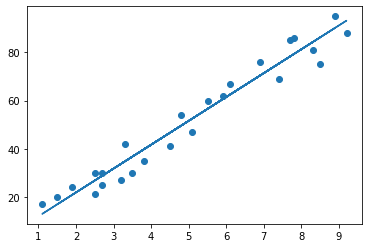

In [38]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, Y)
plt.plot(X, line);
plt.show()

In [36]:
## Training the model

from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, Y_train) 

print("Training completed...")

Training completed...


In [39]:
## Making Predictions 

print(X_test) # Testing data - In Hours
Y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [41]:
# Comparing Actual vs Predicted
data_1 = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})  
data_1

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [52]:
# We can also test with our own data with this method

hours = [[8.9]]
own_pred = regressor.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[8.9]]
Predicted Score = 90.22300271915057


In [ ]:
### OLS Summary 

In [65]:
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm 

X_constant=sm.add_constant(X)
model=sm.OLS(Y,X_constant).fit()
predictions = model.predict(X_constant)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     465.8
Date:                Thu, 08 Oct 2020   Prob (F-statistic):           9.13e-17
Time:                        01:57:26   Log-Likelihood:                -77.514
No. Observations:                  25   AIC:                             159.0
Df Residuals:                      23   BIC:                             161.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4837      2.532      0.981      0.337      -2.753       7.721
x1             9.7758      0.453     21.583      0.000       8.839      10.713
==============================================================================
Omnibus:                        7.616   Durbin-Watson:                   1.460
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                2.137
Skew:                          -0.216   Prob(JB):                        0.343
Kurtosis:                       1.634   Cond. No.                         13.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [69]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()